# Automatic Ticket Assignment
**The Real Problem**

One of the key activities of any IT function is to “Keep the lights on” to ensure there is no impact to the Business operations. IT leverages Incident Management process to achieve the above Objective. An incident is something that is unplanned interruption to an IT service or reduction in the quality of an IT service that affects the Users and the Business. The main goal of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact. In most of the organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have
access to ticketing systems, and from the integrated monitoring systems and tools. Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources. The assignment of incidents to appropriate IT groups is still a manual process in many of the IT organizations. Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times
which result in user satisfaction deterioration / poor customer service.



**Business Domain Value**

In the support process, incoming incidents are analyzed and assessed by organization’s support teams to fulfill the request. In many organizations, better allocation and effective usage of the valuable support resources will directly result in substantial cost savings. Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This team will review the incidents for right ticket categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams. Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve
the incidents. Around ~56% of incidents are resolved by Functional / L3 teams. Incase if vendor support is needed, they will reach out for their support towards incident closure. L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams. During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service. Guided by powerful AI techniques that can classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks.



#Project Description:

In this capstone project, the goal is to build a classifier that can classify the tickets by analyzing text.
Details about the data and dataset files are given in below link, https://drive.google.com/open?id=1OZNJm81JXucV3HmZroMq6qCT2m7ez7IJ

## Install Google translator

In [ ]:
pip install googletrans

In [ ]:
pip install pyLDAvis

## **Get Required Files from Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Set your project path
project_path = '/content/drive/My Drive/Colab Notebooks/Capstone Final/'
Excel_data_file = project_path + "input_data.xlsx"
print(Excel_data_file)

/content/drive/My Drive/Colab Notebooks/Capstone Final/input_data.xlsx


##**Importing necessary headers**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
%matplotlib inline
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D, GRU
from tensorflow.keras.models import Model, Sequential
from dateutil import parser
from wordcloud import WordCloud, STOPWORDS
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim
import googletrans
from googletrans import Translator
import warnings

from gensim.models import Word2Vec
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D,GRU,Conv1D,MaxPooling1D

import tensorflow as tf
from sklearn import metrics
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ModuleNotFoundError: ignored

In [ ]:
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## **Reading and Exploring Data**

In [ ]:
data = pd.read_excel(Excel_data_file)
data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


**Observations:**

The given data has a total of 8500 entries and 4 columns:
1. Short Description
2. Description
3. Caller
4. Assignment group

Column 'Assignment group' is our target/independent variable Y where as the other 3 columns are dependent variables X. All the columns are of datatype object. Also 8 records in Short description have null value and 1 record in Description have null value. We will see this in detail below.

In [ ]:
data.shape

(8500, 4)

In [ ]:
data.columns

Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')

In [ ]:
data.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

**Observations:**

The data has 8500 records/articles and 4 columns. There are null records in the data as seen above.Remove the 9 records that had null values.


In [ ]:
#Dropping the null values
data.dropna(inplace=True)

In [ ]:
data.shape

(8491, 4)

Removed the 9 records with null values since it does not add any value in our model building and prediction

## **Data Visualization & EDA**

In [ ]:
data['Assignment group'].nunique()

74

In [ ]:
data['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

Totally there are 74 unique assignment groups from GRP_0 to GRP_73

In [ ]:
data.describe()

,Short description,Description,Caller,Assignment group
count,8491,8491,8491,8491
unique,7480,7812,2948,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3968


In [ ]:
data['Assignment group'].value_counts()

GRP_0     3968
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_61       1
GRP_73       1
GRP_70       1
GRP_67       1
GRP_35       1
Name: Assignment group, Length: 74, dtype: int64

In [ ]:
group_count = data['Assignment group'].value_counts()
group_count.describe()

count      74.000000
mean      114.743243
std       464.840614
min         1.000000
25%         5.250000
50%        26.000000
75%        84.000000
max      3968.000000
Name: Assignment group, dtype: float64

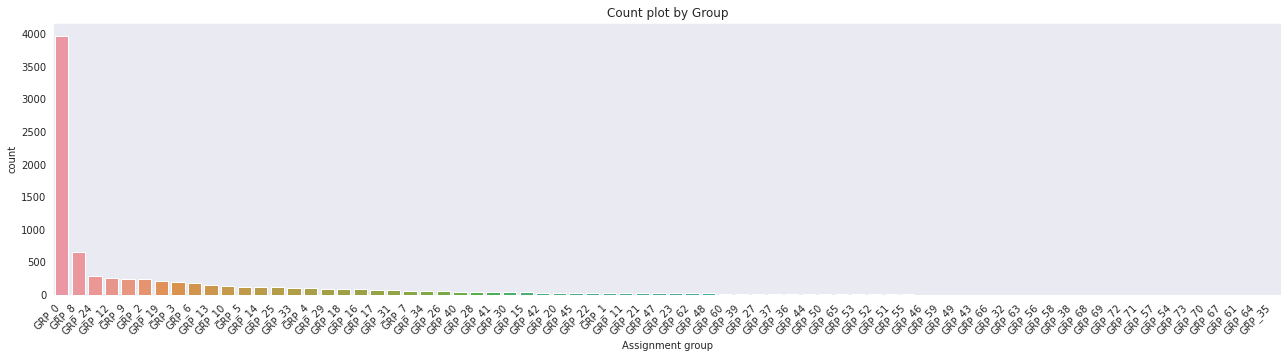

In [ ]:
sns.set_style("dark")

descending_order = data['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
ax=sns.countplot(x='Assignment group', data=data,order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title("Count plot by Group")
plt.show()

As seen from the graph above, the given data is highly skewed with GRP_0 having more than 45% of the records. The other groups with high records are GRP_8, GRP_24, GRP_12, GRP_9. There are many groups with only 1 record which leads to bias in the prediction.

In [ ]:
data['Caller'].nunique()

2948

In [ ]:
data['Caller'].value_counts()

bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
                    ... 
vebizknu qlknijvb      1
ruhbyzpv vlksnjti      1
eahkpnbm uptiveok      1
eqcudbks zbjeqruy      1
psbulrdt jxkvzmnf      1
Name: Caller, Length: 2948, dtype: int64

There are only 2950 callers in total for 8500 records which means that each caller may have raised one or more than one ticket.

In [ ]:
caller_count = data['Caller'].value_counts()
caller_count.describe()

count    2948.000000
mean        2.880258
std        15.852312
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       810.000000
Name: Caller, dtype: float64

In [ ]:
CallerGrp = data.groupby(['Caller'])
LeastDataCaller=[]
for grp in data['Caller'].unique():
  if(CallerGrp.get_group(grp).shape[0]<2):
    LeastDataCaller.append(grp)
print('Number of Callers who made only 1 call: ', (len(LeastDataCaller)))

Number of Callers who made only 1 call:  1459


**Observations:**

From the above data, it is clearly visible that:
1. The caller data is also highly skewed with the max being 810 but even the 75% data is at 3 records per caller.
2. There were totally 2950 unique callers of which 1460 callers have created only 1 ticket.
3. The remaining 1490 callers have created more than 2 tickets.
4. **bpctwhsn kzqsbmtp** is the caller who raised maximum tickets.
5. The top most word used in short description is **password reset**

## **Duplicates Removal and Translation**

In [ ]:
#Find duplicate records in the given data
duplicate_data = data[data.duplicated()]
print(len(duplicate_data))

83


In [ ]:
duplicate_data.head()

,Short description,Description,Caller,Assignment group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
229,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
493,ticket update on inplant_872730,ticket update on inplant_872730,fumkcsji sarmtlhy,GRP_0
512,blank call //gso,blank call //gso,rbozivdq gmlhrtvp,GRP_0
667,job bkbackup_tool_powder_prod_full failed in j...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8


Looks like there are 83 records with duplicate values and this needs to be cleaned.

In [ ]:
#Removing those duplicates
data = data.drop_duplicates()
data.shape

(8408, 4)

All the 83 duplicate records have been removed from the data. Now lets continue with Translation.

In [ ]:
df_before_translation = data.copy() ##Taking backup before translation
df_before_translation.tail()

,Short description,Description,Caller,Assignment group
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49


Since the data has lot of german text and also non-ascii characters, we need to translate all the data to English language. Hence using the google translator API to translate the given data for those records that are not in English language.

In [ ]:
#Translate to english if the given sentence is not in english.
def Translate_to_English(x):
    translator = Translator()
    if translator.detect(x).lang != 'en':
        #print("Source: ", x)
        translatedText = translator.translate(x).text
        #print("Translated text in English: ", translatedText)
    else:
        translatedText = x
    return translatedText

In [ ]:
#Translate the description column and short description column
for i in data.index:
  data['Description'][i] = Translate_to_English(str(data['Description'][i]))
  data['Short description'][i] = Translate_to_English(str(data['Short description'][i]))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
data.tail()

,Short description,Description,Caller,Assignment group
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine is not working,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62
8499,Different prgramdntymes cannot be opened on se...,Different prgramdntymes cannot be opened on se...,kqvbrspl jyzoklfx,GRP_49


In [ ]:
##Saved a copy of translated text as csv in drive
data.to_excel(project_path + 'Translated_Data.xlsx')
#!cp translated_team.csv "/content/drive/My Drive/NLP_capstone/"

In [ ]:
#data = pd.read_csv(project_path + 'Translated_Data.csv')

In [ ]:
#data.tail()

## **Data Cleansing & Preprocessing**

In [ ]:
#Making a copy of the data and then cleaning the data
df_translated_before_cleaning = data.copy()

In [ ]:
data.shape

(8408, 4)

### Clean the Description column

1. Combined short description and description columns together to make sure all the data is captured properly. Keeping Description and Short description separate does not make sense since both have repeated strings in most of the records.
2. Also, since caller info is not relevant, removing that from the new dataframe.
3. The new data will have 8408 records with 2 columns

In [ ]:
#Having callers unique list separately to remove the caller names from description later.
callers = data['Caller'].unique()

In [ ]:
## merging the Short Description and Description Columns
new_data= pd.DataFrame({"Description": data["Short description"] + " " + data["Description"], "AssignmentGroup": data["Assignment group"]}, columns=["Description","AssignmentGroup"])

In [ ]:
new_data.head()

,Description,AssignmentGroup
0,login issue -verified user details.(employee# ...,GRP_0
1,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,GRP_0
2,cant log in to vpn \r\n\r\nreceived from: eylq...,GRP_0
3,unable to access hr_tool page unable to access...,GRP_0
4,skype error skype error,GRP_0


In [ ]:
new_data.shape

(8408, 2)

In [ ]:
new_data.isna().sum()

Description        0
AssignmentGroup    0
dtype: int64

The description has lots of unwanted characters/words like mail addresses, numbers, special characters, disclaimer messages etc. So we will clean them first.

1. Remove Disclaimers
2. Replace different formats like ftp with its location, ip address, etc with proper strings for better processing and predictions.
3. Check for valid dates
4. Remove emails, hyperlinks, numbers, special characters, non utf characters, etc


In [ ]:
#This function is to remove the disclaimer messages given as part of the email sent by callers which is not needed
def Remove_Disclaimer(text):
   text = str(text)
   strDisclaimerMsg1 = r'this communication is intended solely for the use of the addressee and may contain information that is sensitive, confidential or excluded from disclosure in accordance with applicable law. it is strictly forbidden to distribute, distribute or reproduce this communication by anyone other than the intended recipient. if you have received this message by mistake, please notify the sender and delete this message.'
   strDisclaimerMsg2 = r'select the following link to view the disclaimer in an alternate language.'
   #to remove the pattern '[ # + company / posts> ['
   strDisclaimerMsg3 = r'\[.*?\['
   strDisclaimerMsg4 = r'this message is intended for the exclusive use of the person to whom it is addressed and may contain privileged, confidential information that is exempt from disclosure in accordance with the provisions of current legislation. any dissemination, distribution or reproduction of this message by someone other than the intended recipient is strictly prohibited. if you receive this message in error, please notify the sender and delete this message.'
   #text=text.lower()
   text = re.sub(strDisclaimerMsg1, ' ',str(text))
   text = re.sub(strDisclaimerMsg2, ' ',str(text))
   text = re.sub(strDisclaimerMsg3, ' ',str(text))
   text = re.sub(strDisclaimerMsg4, ' ',str(text))

   text = text.strip()
   return text


In [ ]:
#Replace known formats with proper strings for better prediction
def preprocess_replace(text1):
  text1=text1.replace(to_replace='[Hh][Oo][sS][Tt][nN][Aa][Mm][Ee]_[0-9]*',value='hostname ',regex = True)
  text1=text1.replace(to_replace='ftp*.*', value='ftp location ', regex=True)
  text1=text1.replace(to_replace='[a-z0-9_]*.xlsx',value='excel ', regex=True)
  text1=text1.replace(to_replace='outside:[0-9./]*',value='outside ipaddress ',regex=True)
  text1=text1.replace(to_replace='inside:[0-9./]*',value='inside ipaddress ',regex=True)
  text1=text1.replace(to_replace='\\*hostname[_0-9]*',value='hostname ',regex=True)
  text1=text1.replace(to_replace='lmsl[0-9]*',value='lmsl ',regex=True)
  text1=text1.replace(to_replace='SID_[0-9][0-9]',value='sid ',regex = True)
  text1=text1.replace(to_replace='[Tt]icket_no[0-9]*',value='ticket_no ', regex=True)
  text1=text1.replace(to_replace='[jJ]ob_[0-9_a-z]*',value='job_id ',regex=True)
  text1=text1.replace(to_replace='[0-9]+.[0-9]+.[0-9]+.[0-9]+[/0-9]*',value='ipaddress ',regex=True)
  return text1

replace() function requires dataframe to be passed as such and not str format. Hence the call is outside of clean_data function

In [ ]:
new_data['Description'] = preprocess_replace(new_data['Description'])
new_data.head()

,Description,AssignmentGroup
0,login issue -verified user details.(employee# ...,GRP_0
1,outlook \r\n\r\nreceived from: hmjdrvpb.komuay...,GRP_0
2,cant log in to vpn \r\n\r\nreceived from: eylq...,GRP_0
3,unable to access hr_tool page unable to access...,GRP_0
4,skype error skype error,GRP_0


In [ ]:
def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False

In [ ]:
def clean_data(text):
    text=text.lower()
    text = ' '.join([w for w in text.split() if not is_valid_date(w)])

    text = Remove_Disclaimer(text)
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    #Remove email
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove numbers
    text = re.sub(r'\d+',' ' ,text)
    # Remove new line characters
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#',' ', text)
    #&
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF')
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    for name in callers:
      namelist = [part for part in name.split()]
      for namepart in namelist:
          text = text.replace(namepart,'')

    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text

In [ ]:
#Cleaning the data and applying the regular expression rules
new_data['Description'] = new_data['Description'].apply(clean_data)

In [ ]:
new_data.head()

,Description,AssignmentGroup
0,login issue verified user details employee and...,GRP_0
1,outlook hello team my meetings skype meetings ...,GRP_0
2,cant log in to vpn hi cannot log on to vpn best,GRP_0
3,unable to access hr tool page unable to access...,GRP_0
4,skype error skype error,GRP_0


In [ ]:
new_data.to_excel(project_path + "CleanedData.xlsx")

As you can see, all the unwanted characters/words are removed from the description column

## Tokenization, Lemmatization and Stop words Removal


As part of NLP data procesing, it is important to do Lemmatization, tokenization and stop words removal.

1. Tokenize the words
2. POS Tagging
3. Lemmatize the words
4. Remove the duplicate words in same sentence
5. Prepare bag of words for every record
6. Remove some of the known strings like hello, hi, good morning, good evening, etc

In [ ]:
lemmatizer = WordNetLemmatizer()

# function to convert nltk tag to wordnet tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

# Function to convert array into string
def listToString(s):
    str1 = " "
    return (str1.join(s))


def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tokenized = nltk.word_tokenize(sentence)
    ordered_tokens = set()
    result = []
    #remove duplicate words in sentence
    for word in nltk_tokenized:
        if word not in ordered_tokens:
            ordered_tokens.add(word)
            result.append(word)
    new_desc = listToString(result)

    nltk_tagged = nltk.pos_tag(ordered_tokens)
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence),new_desc


temp =[]
temp1 = []
for sentence in new_data["Description"]:
    sentence = sentence.lower()
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', sentence)        #Removing HTML tags
    sentence = re.sub(r'\S+@\S+', 'EmailId', sentence)
    sentence = re.sub(r'\'', '', sentence, re.I|re.A)
    sentence = re.sub(r'[0-9]', '', sentence, re.I|re.A)
    sentence = re.sub(r'[^a-zA-Z0-9\s]', ' ', sentence)
    sentence = sentence.lower()
    sentence = re.sub(r'com ', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'hello team', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'hello ', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'hi team', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'hi', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'hello team', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'best', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'kind', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'hello helpdesk', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'good morning ', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'good afternoon ', ' ', sentence, re.I|re.A)
    sentence = re.sub(r'good evening ', ' ', sentence, re.I|re.A)
    l_sentence,new_desc = lemmatize_sentence(sentence)

    words = [word for word in l_sentence.split() if word not in stopwords.words('english')]
    descWords = [word for word in new_desc.split() if word not in stopwords.words('english')]
    temp.append(words)
    temp1.append(listToString(descWords))

In [ ]:
#Add the corrected description and bag of words in the data frame
new_data['BagOfWords'] = temp
new_data['NewDescription'] = temp1

In [ ]:
new_data.head()

,Description,AssignmentGroup,BagOfWords,NewDescription
0,login issue verified user details employee and...,GRP_0,"[caller, employee, check, login, ad, name, abl...",login issue verified user details employee man...
1,outlook hello team my meetings skype meetings ...,GRP_0,"[calendar, skype, advise, meeting, appear, etc...",outlook meetings skype etc appearing calendar ...
2,cant log in to vpn hi cannot log on to vpn best,GRP_0,"[vpn, cant, log]",cant log vpn
3,unable to access hr tool page unable to access...,GRP_0,"[hr, tool, page, unable, access]",unable access hr tool page
4,skype error skype error,GRP_0,"[error, skype]",skype error


In [ ]:
#Skip if any description is null or empty
final_data = new_data[new_data['NewDescription'].map(lambda d: len(d)) > 0]

In [ ]:
final_data.shape

(8376, 4)

In [ ]:
print(pd.Series({c: final_data[c].map(lambda x: len(str(x))).max() for c in final_data}).sort_values(ascending =False))

Description        7668
BagOfWords         4316
NewDescription     3249
AssignmentGroup       6
dtype: int64


The max length for description after all the clean up is 3249 characters.

In [ ]:
# calculate the length(number of characters) and number of words in every record and add it to the dataframe
final_data['length']=[len(text) for text in final_data['NewDescription']]
final_data['num_words'] = final_data['NewDescription'].apply(lambda x : len(x.split()))
final_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Description,AssignmentGroup,BagOfWords,NewDescription,length,num_words
0,login issue verified user details employee and...,GRP_0,"[caller, employee, check, login, ad, name, abl...",login issue verified user details employee man...,126,18
1,outlook hello team my meetings skype meetings ...,GRP_0,"[calendar, skype, advise, meeting, appear, etc...",outlook meetings skype etc appearing calendar ...,76,10
2,cant log in to vpn hi cannot log on to vpn best,GRP_0,"[vpn, cant, log]",cant log vpn,12,3
3,unable to access hr tool page unable to access...,GRP_0,"[hr, tool, page, unable, access]",unable access hr tool page,26,5
4,skype error skype error,GRP_0,"[error, skype]",skype error,11,2


In [ ]:
final_data.shape

(8376, 6)

In [ ]:
#Copy the data and take the records that has only more that 3 characters for final data
final_data1 =  final_data.copy()
final_data1=final_data1[final_data1['length']>=3]
final_data1.head()

,Description,AssignmentGroup,BagOfWords,NewDescription,length,num_words
0,login issue verified user details employee and...,GRP_0,"[caller, employee, check, login, ad, name, abl...",login issue verified user details employee man...,126,18
1,outlook hello team my meetings skype meetings ...,GRP_0,"[calendar, skype, advise, meeting, appear, etc...",outlook meetings skype etc appearing calendar ...,76,10
2,cant log in to vpn hi cannot log on to vpn best,GRP_0,"[vpn, cant, log]",cant log vpn,12,3
3,unable to access hr tool page unable to access...,GRP_0,"[hr, tool, page, unable, access]",unable access hr tool page,26,5
4,skype error skype error,GRP_0,"[error, skype]",skype error,11,2


In [ ]:
final_data1.drop(['Description'], axis=1,inplace=True)

In [ ]:
final_data1.rename(columns = {'NewDescription':'Description'}, inplace = True)

In [ ]:
final_data1 = final_data1[['Description','BagOfWords','length','num_words','AssignmentGroup']]
final_data1.head()

,Description,BagOfWords,length,num_words,AssignmentGroup
0,login issue verified user details employee man...,"[caller, employee, check, login, ad, name, abl...",126,18,GRP_0
1,outlook meetings skype etc appearing calendar ...,"[calendar, skype, advise, meeting, appear, etc...",76,10,GRP_0
2,cant log vpn,"[vpn, cant, log]",12,3,GRP_0
3,unable access hr tool page,"[hr, tool, page, unable, access]",26,5,GRP_0
4,skype error,"[error, skype]",11,2,GRP_0


In [ ]:
final_data1.shape

(8368, 5)

In [ ]:
final_data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
length,8368.0,90.929732,140.621987,3.0,26.0,50.0,109.0,3249.0
num_words,8368.0,13.037643,18.760596,1.0,4.0,8.0,16.0,426.0


In [ ]:
bins=[0,50,75, np.inf]
final_data1['bins']=pd.cut(final_data1.num_words, bins=[0,30,50,100,300, np.inf], labels=['0-30', '30-50', '50-100','100-300' ,'>300'])
word_distribution = final_data1.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [ ]:
word_distribution

,bins,counts
0,0-30,7675
1,30-50,498
2,50-100,156
3,100-300,32
4,>300,7


As seen above, the max character length for the description column in 3249 and max no. of words is 426. There are no records that have greater than 500 words. Almost 98% of the records have words in the range of 1-30 which means most of the customers have given only short description on their issue.

Text(0.5, 1.0, 'Word distribution per bin')

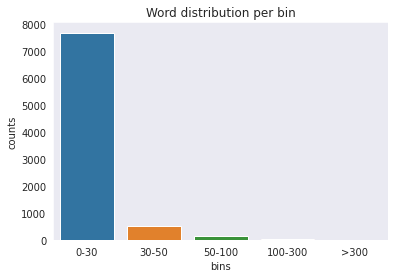

In [ ]:
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

In [ ]:
final_data1.to_excel(project_path + "FinalData.xlsx")

### Combine non-frequent Assignment groups

Combining the groups that has less than 10 samples into a single group called LeastDataGroup. This is mainly done because, as seen in the EDA, there are 25 groups that had less than 10 samples only and this will not help in predictions. So combining them into one group will help to categorize/classify the tickets correctly.

We will see how the two data (1. Data without grouping, 2. Data with grouping) differ in the performance while modeling the data.

In [ ]:
#Take a copy
Final_Data_Grouped = final_data1.copy()

In [ ]:
AssignmentGrp = Final_Data_Grouped.groupby(['AssignmentGroup'])
LeastDataGroup=[]
for grp in Final_Data_Grouped['AssignmentGroup'].unique():
  if(AssignmentGrp.get_group(grp).shape[0]<10):
    LeastDataGroup.append(grp)
print('Number of groups that has less than 10 samples: ', (len(LeastDataGroup)))
Final_Data_Grouped['AssignmentGroup']=Final_Data_Grouped['AssignmentGroup'].apply(lambda x : 'least_data_grp' if x in LeastDataGroup  else x)


Number of groups that has less than 10 samples:  25


In [ ]:
Final_Data_Grouped['AssignmentGroup'].nunique()

50

In [ ]:
Final_Data_Grouped['AssignmentGroup'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'least_data_grp', 'GRP_36', 'GRP_37', 'GRP_39',
       'GRP_40', 'GRP_41', 'GRP_42', 'GRP_44', 'GRP_45', 'GRP_47',
       'GRP_50', 'GRP_53', 'GRP_48', 'GRP_60', 'GRP_62', 'GRP_65'],
      dtype=object)

As you can see, the uniqueness count is reduced from 74 to 50 groups now for Assignment Group. The regrouping is done because with very less samples (each group having 1 or 2 records) might not help us in proper classification and that can impact our accuracy. So we will group such data into 1 group (Least data group/miscellaneous group) that can help us improve the accuracy.

## **Bigrams & TriGrams**

We will build a bigram and trigram model and see how the words are co-occuring together in the given data

In [ ]:
#Split the given sentence to individual words
def SplitSentenceToWords(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [ ]:
#Collect the bag of words
bag_of_words = list(SplitSentenceToWords(final_data1['Description']))
print(bag_of_words[1])

['outlook', 'meetings', 'skype', 'etc', 'appearing', 'calendar', 'somebody', 'please', 'advise', 'correct']


In [ ]:
# define the bigram and trigram models (higher threshold is used to have fewer phrases)
bigram = gensim.models.Phrases(bag_of_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[bag_of_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_model = gensim.models.phrases.Phraser(bigram)
trigram_model = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
#Build bigram and trigram model for given data
def Build_Bigrams(texts):
    return [bigram_model[doc] for doc in texts]

def Build_Trigrams(texts):
    return [trigram_model[doc] for doc in texts]


In [ ]:
# Form Bigrams
data_words_bigrams = Build_Bigrams(bag_of_words)
print(data_words_bigrams)

#Form trigrams
data_words_trigrams = Build_Trigrams(data_words_bigrams)
print(data_words_trigrams)

You can see the sample bigram and trigram data as seen above.

1. **Bigram samples**: details_employee, checked_ad, caller_confirmed, etc
2. **Trigram samples**: details_employee_manager, caller_confirmed_able, ticket_update_inplant

### Word Cloud for Bigrams

Building word cloud gives a very good representation of the frequent words occuring together and further actions to be taken accordingly

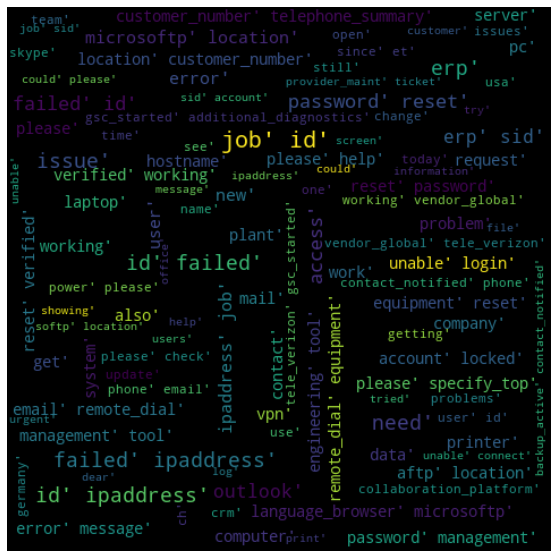

In [ ]:
#Build word cloud for Bigrams Model
wordclouds=' '.join(map(str, data_words_bigrams))
wordcloud = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10).generate(wordclouds)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

### Word Cloud for Trigrams

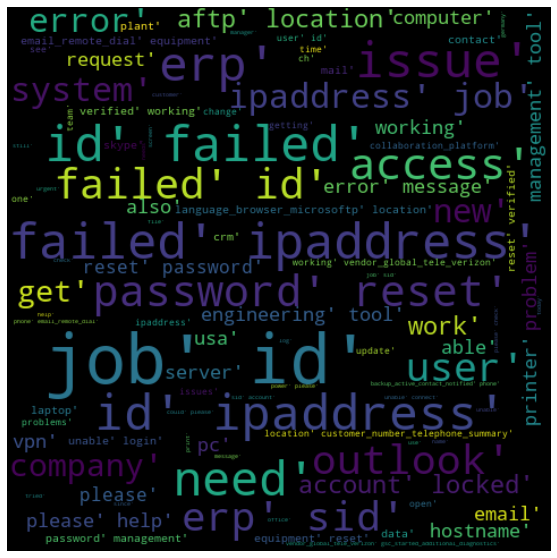

In [ ]:
wordcloud_trigram=' '.join(map(str, data_words_trigrams))
wordcloud = WordCloud(width=480, height=480, max_words=100).generate(wordcloud_trigram)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## **Word Cloud for Groups**

Let's see the word cloud for different groups. This will give a good representation on the maximum usage of words in every group and helps better in classification

In [ ]:
stopwords = set(STOPWORDS)
## function to create Word Cloud
def show_wordcloud(data, title):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40,
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10, 5))
    plt.axis('off')
    #fig.title("Top 100 words of {}".format(title))
    if title:
        fig.suptitle("Top 100 words of {}".format(title), fontsize=50, color='blue', fontweight = 'bold')
        #fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [ ]:
#Sorting based on frequency of target class Assignment group
value = final_data1['AssignmentGroup'].value_counts().sort_values(ascending=False).index
value

Index(['GRP_0', 'GRP_8', 'GRP_24', 'GRP_12', 'GRP_9', 'GRP_2', 'GRP_19',
       'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14', 'GRP_25',
       'GRP_33', 'GRP_4', 'GRP_29', 'GRP_18', 'GRP_16', 'GRP_7', 'GRP_17',
       'GRP_31', 'GRP_34', 'GRP_26', 'GRP_40', 'GRP_28', 'GRP_41', 'GRP_15',
       'GRP_42', 'GRP_20', 'GRP_45', 'GRP_22', 'GRP_1', 'GRP_11', 'GRP_21',
       'GRP_47', 'GRP_62', 'GRP_23', 'GRP_30', 'GRP_39', 'GRP_27', 'GRP_60',
       'GRP_37', 'GRP_44', 'GRP_36', 'GRP_50', 'GRP_48', 'GRP_65', 'GRP_53',
       'GRP_52', 'GRP_51', 'GRP_55', 'GRP_46', 'GRP_59', 'GRP_49', 'GRP_43',
       'GRP_66', 'GRP_32', 'GRP_56', 'GRP_63', 'GRP_58', 'GRP_68', 'GRP_38',
       'GRP_69', 'GRP_72', 'GRP_71', 'GRP_57', 'GRP_54', 'GRP_73', 'GRP_70',
       'GRP_67', 'GRP_61', 'GRP_64', 'GRP_35'],
      dtype='object')

In [ ]:
print(len(value))

74


There are totally 74 groups and we will see the top 100 words of top 3 groups

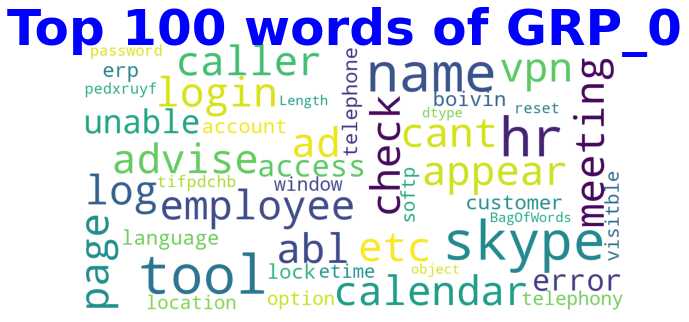

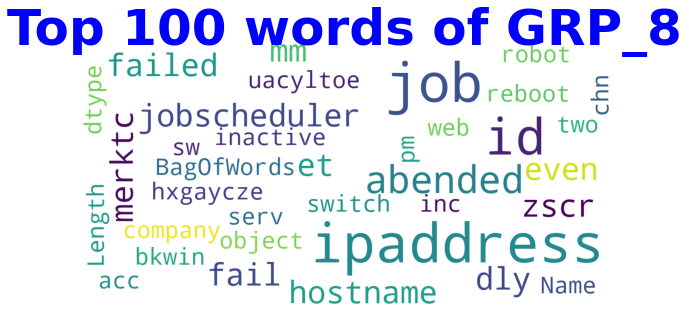

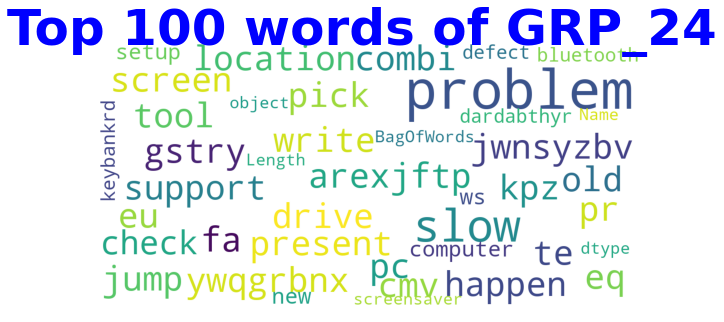

In [ ]:
group = ['GRP_0','GRP_8', 'GRP_24' ]
for i in range(len(group)):

    CloudGrp = final_data1[final_data1['AssignmentGroup'] == group[i]]
    CloudGrp = CloudGrp['BagOfWords']
    show_wordcloud(CloudGrp,group[i])

**Observations:**

1. GRP 0  are mostly account related issues like skype account, vpn account, access issues where HR or manager help is required to proceed further
2. GRP 8 is mostly related to server issues, scheduler job issues that is not working or inactive and needs a restart
3. GRP 24 is mostly related to computer issues like screen issues, drive issues, computer slowness, bluetooth issues etc which needs support to be fixed

## Create Dictionary

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(final_data1['BagOfWords'])

# Create Corpus from post clean data
texts = final_data1['BagOfWords']

# Term Document Frequency and Bag of words
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
# View as ID
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)]]


In [ ]:
# View as word
print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]])

[[('able', 1), ('ad', 1), ('advised', 1), ('caller', 1), ('check', 2), ('confirmed', 1), ('detail', 1), ('employee', 1), ('issue', 1), ('login', 1), ('manager', 1), ('name', 1), ('password', 1), ('reset', 1), ('resolve', 1), ('user', 1), ('verify', 1)]]


## Test and Train Data Split

For our modeling and train_test_split, we will use both the data:
1. data with grouping that is stored in the dataframe Final_Data_grouped
2. data without grouping that is stored in the dataframe final_data1

and see how the performance/accuracy of the model differs and which model works better.


### Split Train, Test and Validation data

In [ ]:
# Split into Test, train, validation for Ungrouped data

train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

final_data1.head()
X = final_data1['Description']
y = final_data1['AssignmentGroup']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

In [ ]:
# Split into Test, train, validation for Ungrouped data

train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

Final_Data_Grouped.head()
X_Grped = Final_Data_Grouped['Description']
Y_Grped = Final_Data_Grouped['AssignmentGroup']
X_train_Grped, X_test_Grped, y_train_Grped, y_test_Grped = train_test_split(X_Grped, Y_Grped, test_size=1 - train_ratio)

X_val_Grped, X_test_Grped, y_val_Grped, y_test_Grped = train_test_split(X_test_Grped, y_test_Grped, test_size=test_ratio/(test_ratio + validation_ratio))

# Machine Learning Modeling


In this section, we will use some of the traditional Machine learning models to see how the results are achieved for both kind of data approach that we are using.

We will use:

1. Logistic Regression Model
2. Support Vector Classifier Model
3. Decision tree Classifier Model
4. Random Forest Model
5. Adaboost Classifier Model

### Logistic Regression Model for Ungrouped data

In [ ]:
# Model1 : Logistic regression model to build, fit and predict the target class
#build the pipeline
lr = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression()),
             ])

#fit the model with training data
lr.fit(X_train, y_train)
#predict the model for test data
y_pred = lr.predict(X_test)

#calculate scores and print classification report
LR_Accuracy_Score = accuracy_score(y_test,y_pred)
print('accuracy %s' % LR_Accuracy_Score)
LR_F1_Score = f1_score(y_test,y_pred, average='weighted')
print('Testing F1 score: {}'.format(LR_F1_Score))
print(classification_report(y_test, y_pred))

accuracy 0.6415770609318996
Testing F1 score: 0.5509002673603138
              precision    recall  f1-score   support

       GRP_0       0.64      0.99      0.78       817
       GRP_1       0.00      0.00      0.00        10
      GRP_10       1.00      0.30      0.46        20
      GRP_11       0.00      0.00      0.00         5
      GRP_12       0.55      0.57      0.56        49
      GRP_13       0.57      0.41      0.48        29
      GRP_14       0.57      0.17      0.27        23
      GRP_15       0.00      0.00      0.00         5
      GRP_16       0.00      0.00      0.00        10
      GRP_17       1.00      0.59      0.74        17
      GRP_18       1.00      0.12      0.22        16
      GRP_19       1.00      0.06      0.11        53
       GRP_2       0.76      0.35      0.48        46
      GRP_20       0.00      0.00      0.00         6
      GRP_21       0.00      0.00      0.00         8
      GRP_22       0.00      0.00      0.00         6
      GRP_23    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression Model for Grouped data

In [ ]:
lr_grped = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression()),
             ])


lr_grped.fit(X_train_Grped, y_train_Grped)
y_pred_grped = lr_grped.predict(X_test_Grped)

LR_Grp_Accuracy_Score = accuracy_score(y_test_Grped,y_pred_grped)
print('accuracy %s' % LR_Grp_Accuracy_Score)
LR_Grp_F1_Score = f1_score(y_test_Grped,y_pred_grped, average='weighted')
print('Testing F1 score: {}'.format(LR_Grp_F1_Score))
print(classification_report(y_test_Grped, y_pred_grped))

accuracy 0.6176821983273596
Testing F1 score: 0.5263098347000964
                precision    recall  f1-score   support

         GRP_0       0.61      0.98      0.75       779
         GRP_1       0.00      0.00      0.00         9
        GRP_10       1.00      0.14      0.25        28
        GRP_11       0.00      0.00      0.00         8
        GRP_12       0.51      0.52      0.51        52
        GRP_13       0.92      0.39      0.55        28
        GRP_14       0.75      0.13      0.22        23
        GRP_15       0.00      0.00      0.00        10
        GRP_16       0.00      0.00      0.00        17
        GRP_17       1.00      0.60      0.75        15
        GRP_18       0.33      0.06      0.10        18
        GRP_19       0.50      0.13      0.21        45
         GRP_2       0.44      0.13      0.20        53
        GRP_20       0.00      0.00      0.00         5
        GRP_21       0.00      0.00      0.00         5
        GRP_22       0.00      0.00   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Compare the Models

In [ ]:
#Compare the two models against the accuracy and F1 score
Compare = [[LR_Accuracy_Score, LR_F1_Score],
           [LR_Grp_Accuracy_Score, LR_Grp_F1_Score]]

Compare_Models = pd.DataFrame(Compare, columns= ['Accuracy','F1 Score'], index=['LR Model','LR_Grped'])
Compare_Models

,Accuracy,F1 Score
LR Model,0.641577,0.55090
LR_Grped,0.617682,0.52631


**Observations:**

1. Accuracy and F1 Score for grped data are slightly better than ungrouped ones.

But we can see how the behavior is with other models as well

### Support Vector Classifier Model for Ungrouped data

In [ ]:
#Model 2: Support Vector Classifier

svc = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SVC()),
              ])
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
SVC_Accuracy_Score = accuracy_score(y_test, y_pred)
print('accuracy %s' % SVC_Accuracy_Score)
SVC_F1_Score = f1_score(y_test, y_pred, average='weighted')
print('Testing F1 score: {}'.format(SVC_F1_Score))
print(classification_report(y_test, y_pred))

accuracy 0.6427718040621266
Testing F1 score: 0.5532938883472743
              precision    recall  f1-score   support

       GRP_0       0.63      0.99      0.77       817
       GRP_1       1.00      0.10      0.18        10
      GRP_10       1.00      0.40      0.57        20
      GRP_11       0.00      0.00      0.00         5
      GRP_12       0.64      0.57      0.60        49
      GRP_13       1.00      0.10      0.19        29
      GRP_14       0.57      0.17      0.27        23
      GRP_15       0.00      0.00      0.00         5
      GRP_16       0.00      0.00      0.00        10
      GRP_17       1.00      0.76      0.87        17
      GRP_18       1.00      0.06      0.12        16
      GRP_19       1.00      0.04      0.07        53
       GRP_2       0.75      0.33      0.45        46
      GRP_20       0.00      0.00      0.00         6
      GRP_21       0.00      0.00      0.00         8
      GRP_22       0.00      0.00      0.00         6
      GRP_23    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Support Vector Classifier Model for Grouped data

In [ ]:
svc = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SVC()),
              ])
svc.fit(X_train_Grped, y_train_Grped)

y_pred_grped= svc.predict(X_test_Grped)
SVC_Grped_Accuracy_Score = accuracy_score(y_test_Grped, y_pred_grped)
print('accuracy %s' % SVC_Grped_Accuracy_Score)
SVC_Grped_F1_Score = f1_score(y_test_Grped, y_pred_grped, average='weighted')
print('Testing F1 score: {}'.format(SVC_Grped_F1_Score))
print(classification_report(y_test_Grped, y_pred_grped))

accuracy 0.6212664277180406
Testing F1 score: 0.5276595655872587
                precision    recall  f1-score   support

         GRP_0       0.60      0.99      0.75       779
         GRP_1       1.00      0.11      0.20         9
        GRP_10       1.00      0.14      0.25        28
        GRP_11       0.00      0.00      0.00         8
        GRP_12       0.57      0.52      0.55        52
        GRP_13       1.00      0.14      0.25        28
        GRP_14       1.00      0.17      0.30        23
        GRP_15       0.00      0.00      0.00        10
        GRP_16       0.00      0.00      0.00        17
        GRP_17       1.00      0.93      0.97        15
        GRP_18       0.50      0.06      0.10        18
        GRP_19       0.75      0.07      0.12        45
         GRP_2       0.47      0.13      0.21        53
        GRP_20       0.00      0.00      0.00         5
        GRP_21       0.00      0.00      0.00         5
        GRP_22       0.00      0.00   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Compare the Models

In [ ]:
#Compare the two models against the accuracy and F1 score
Compare = [[LR_Accuracy_Score, LR_F1_Score],
           [LR_Grp_Accuracy_Score, LR_Grp_F1_Score],
           [SVC_Accuracy_Score, SVC_F1_Score],
           [SVC_Grped_Accuracy_Score, SVC_Grped_F1_Score]]

Compare_Models = pd.DataFrame(Compare, columns= ['Accuracy','F1 Score'], index=['LR Model','LR_Grped', 'SVC Model', 'SVC_Grped'])
Compare_Models

,Accuracy,F1 Score
LR Model,0.641577,0.550900
LR_Grped,0.617682,0.526310
SVC Model,0.642772,0.553294
SVC_Grped,0.621266,0.527660


### Decision Tree Classifier Model with Ungrouped data





In [ ]:
#Model 3: Decision Tree Classifier
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', DecisionTreeClassifier()),
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
DT_Accuracy_Score = accuracy_score(y_test, y_pred)
print('accuracy %s' % DT_Accuracy_Score)
DT_F1_Score = f1_score(y_test, y_pred, average='weighted')
print('Testing F1 score: {}'.format(DT_F1_Score))
print(classification_report(y_test, y_pred))

accuracy 0.6039426523297491
Testing F1 score: 0.5900875894602721
              precision    recall  f1-score   support

       GRP_0       0.78      0.82      0.80       817
       GRP_1       0.50      0.30      0.37        10
      GRP_10       0.47      0.45      0.46        20
      GRP_11       0.00      0.00      0.00         5
      GRP_12       0.54      0.53      0.54        49
      GRP_13       0.40      0.34      0.37        29
      GRP_14       0.41      0.39      0.40        23
      GRP_15       0.40      0.40      0.40         5
      GRP_16       0.25      0.40      0.31        10
      GRP_17       1.00      0.94      0.97        17
      GRP_18       0.19      0.19      0.19        16
      GRP_19       0.29      0.19      0.23        53
       GRP_2       0.44      0.41      0.43        46
      GRP_20       0.00      0.00      0.00         6
      GRP_21       0.00      0.00      0.00         8
      GRP_22       0.50      0.17      0.25         6
      GRP_23    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree Classifier for Grouped data

In [ ]:
#Model 3: Decision Tree Classifier
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', DecisionTreeClassifier()),
              ])
nb.fit(X_train_Grped, y_train_Grped)

y_pred_grped = nb.predict(X_test_Grped)
DT_Grped_Accuracy_Score = accuracy_score(y_test_Grped, y_pred_grped)
print('accuracy %s' % DT_Grped_Accuracy_Score)
DT_Grped_F1_Score = f1_score(y_test_Grped, y_pred_grped, average='weighted')
print('Testing F1 score: {}'.format(DT_Grped_F1_Score))
print(classification_report(y_test_Grped, y_pred_grped))

accuracy 0.5716845878136201
Testing F1 score: 0.5531711288656143
                precision    recall  f1-score   support

         GRP_0       0.74      0.82      0.77       779
         GRP_1       0.00      0.00      0.00         9
        GRP_10       0.50      0.21      0.30        28
        GRP_11       0.00      0.00      0.00         8
        GRP_12       0.33      0.40      0.37        52
        GRP_13       0.40      0.36      0.38        28
        GRP_14       0.31      0.22      0.26        23
        GRP_15       0.20      0.10      0.13        10
        GRP_16       0.35      0.41      0.38        17
        GRP_17       0.93      0.93      0.93        15
        GRP_18       0.31      0.22      0.26        18
        GRP_19       0.28      0.20      0.23        45
         GRP_2       0.32      0.21      0.25        53
        GRP_20       0.00      0.00      0.00         5
        GRP_21       0.00      0.00      0.00         5
        GRP_22       0.00      0.00   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest Model for Ungrouped data


In [ ]:
#Model 4: Random Forest Classifier
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier()),
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
RF_Accuracy_Score = accuracy_score(y_test, y_pred)
print('accuracy %s' % RF_Accuracy_Score )
RF_F1_Score = f1_score(y_test, y_pred, average='weighted')
print('Testing F1 score: {}'.format(RF_F1_Score))
print(classification_report(y_test, y_pred))

accuracy 0.6589008363201911
Testing F1 score: 0.5873840956585203
              precision    recall  f1-score   support

       GRP_0       0.67      0.98      0.80       817
       GRP_1       0.67      0.20      0.31        10
      GRP_10       1.00      0.40      0.57        20
      GRP_11       0.00      0.00      0.00         5
      GRP_12       0.62      0.57      0.60        49
      GRP_13       0.71      0.52      0.60        29
      GRP_14       0.45      0.22      0.29        23
      GRP_15       0.00      0.00      0.00         5
      GRP_16       0.00      0.00      0.00        10
      GRP_17       1.00      0.94      0.97        17
      GRP_18       0.00      0.00      0.00        16
      GRP_19       0.80      0.08      0.14        53
       GRP_2       0.75      0.33      0.45        46
      GRP_20       0.00      0.00      0.00         6
      GRP_21       0.00      0.00      0.00         8
      GRP_22       0.00      0.00      0.00         6
      GRP_23    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest Classifier for Grouped data

In [ ]:
#Model 4: Random Forest Classifier
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier()),
              ])
nb.fit(X_train_Grped, y_train_Grped)

y_pred_grped = nb.predict(X_test_Grped)
RF_Grped_Accuracy_Score = accuracy_score(y_test_Grped, y_pred_grped)
print('accuracy %s' % RF_Grped_Accuracy_Score )
RF_Grped_F1_Score = f1_score(y_test_Grped, y_pred_grped, average='weighted')
print('Testing F1 score: {}'.format(RF_Grped_F1_Score))
print(classification_report(y_test_Grped, y_pred_grped))

accuracy 0.6350059737156512
Testing F1 score: 0.5643006069199269
                precision    recall  f1-score   support

         GRP_0       0.64      0.97      0.77       779
         GRP_1       1.00      0.11      0.20         9
        GRP_10       0.80      0.14      0.24        28
        GRP_11       0.00      0.00      0.00         8
        GRP_12       0.53      0.50      0.51        52
        GRP_13       0.55      0.39      0.46        28
        GRP_14       0.86      0.26      0.40        23
        GRP_15       0.00      0.00      0.00        10
        GRP_16       0.50      0.06      0.11        17
        GRP_17       1.00      0.93      0.97        15
        GRP_18       0.40      0.11      0.17        18
        GRP_19       0.64      0.16      0.25        45
         GRP_2       0.38      0.09      0.15        53
        GRP_20       0.00      0.00      0.00         5
        GRP_21       0.00      0.00      0.00         5
        GRP_22       0.00      0.00   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Adaboost Classifier Model for Ungrouped data


In [ ]:
#Model 5: Adaboost Classifier

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', AdaBoostClassifier()),
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
ABC_Accuarcy_Score = accuracy_score(y_test, y_pred)
print('accuracy %s' % ABC_Accuarcy_Score )
ABC_F1_Score = f1_score(y_test, y_pred, average='weighted')
print('Testing F1 score: {}'.format(ABC_F1_Score))
print(classification_report(y_test, y_pred))

accuracy 0.5203106332138591
Testing F1 score: 0.3870186727591943
              precision    recall  f1-score   support

       GRP_0       0.60      0.95      0.73       817
       GRP_1       0.00      0.00      0.00        10
      GRP_10       0.00      0.00      0.00        20
      GRP_11       0.00      0.00      0.00         5
      GRP_12       0.00      0.00      0.00        49
      GRP_13       0.00      0.00      0.00        29
      GRP_14       0.00      0.00      0.00        23
      GRP_15       0.00      0.00      0.00         5
      GRP_16       0.00      0.00      0.00        10
      GRP_17       0.00      0.00      0.00        17
      GRP_18       0.00      0.00      0.00        16
      GRP_19       0.00      0.00      0.00        53
       GRP_2       0.00      0.00      0.00        46
      GRP_20       0.00      0.00      0.00         6
      GRP_21       0.00      0.00      0.00         8
      GRP_22       0.00      0.00      0.00         6
      GRP_23    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### AdaBoost Classifier for Grouped data

In [ ]:
#Model 5: Adaboost Classifier

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', AdaBoostClassifier()),
              ])
nb.fit(X_train_Grped, y_train_Grped)

y_pred_grped = nb.predict(X_test_Grped)
ABC_Grped_Accuarcy_Score = accuracy_score(y_test_Grped,y_pred_grped)
print('accuracy %s' % ABC_Grped_Accuarcy_Score )
ABC_Grped_F1_Score = f1_score(y_test_Grped, y_pred_grped, average='weighted')
print('Testing F1 score: {}'.format(ABC_Grped_Accuarcy_Score))
print(classification_report(y_test_Grped, y_pred_grped))

accuracy 0.5005973715651135
Testing F1 score: 0.5005973715651135
                precision    recall  f1-score   support

         GRP_0       0.57      0.93      0.71       779
         GRP_1       0.00      0.00      0.00         9
        GRP_10       0.00      0.00      0.00        28
        GRP_11       0.00      0.00      0.00         8
        GRP_12       0.00      0.00      0.00        52
        GRP_13       0.00      0.00      0.00        28
        GRP_14       0.00      0.00      0.00        23
        GRP_15       0.50      0.10      0.17        10
        GRP_16       0.00      0.00      0.00        17
        GRP_17       0.00      0.00      0.00        15
        GRP_18       0.00      0.00      0.00        18
        GRP_19       0.00      0.00      0.00        45
         GRP_2       0.00      0.00      0.00        53
        GRP_20       0.00      0.00      0.00         5
        GRP_21       0.00      0.00      0.00         5
        GRP_22       0.00      0.00   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Compare the Models

In [ ]:
Compare = [[LR_Accuracy_Score, LR_F1_Score],
           [LR_Grp_Accuracy_Score, LR_Grp_F1_Score],
           [SVC_Accuracy_Score, SVC_F1_Score],
           [SVC_Grped_Accuracy_Score, SVC_Grped_F1_Score],
           [DT_Accuracy_Score, DT_F1_Score],
           [DT_Grped_Accuracy_Score, DT_Grped_F1_Score],
           [RF_Accuracy_Score, RF_F1_Score],
           [RF_Grped_Accuracy_Score, RF_Grped_F1_Score],
           [ABC_Accuarcy_Score,ABC_F1_Score],
           [ABC_Grped_Accuarcy_Score, ABC_Grped_F1_Score]]

Compare_Models = pd.DataFrame(Compare, columns= ['Accuracy','F1 Score'], index=['LR Model','LR_Grped','SVC Model','SVC Grped','Decision Tree', 'Decision Tree Grped','Random Forest','Random Forest Grped','AdaBoost','AdaBoost Grped'])
Compare_Models

,Accuracy,F1 Score
LR Model,0.641577,0.550900
LR_Grped,0.617682,0.526310
SVC Model,0.642772,0.553294
SVC Grped,0.621266,0.527660
Decision Tree,0.603943,0.590088
Decision Tree Grped,0.571685,0.553171
Random Forest,0.658901,0.587384
Random Forest Grped,0.635006,0.564301
AdaBoost,0.520311,0.387019
AdaBoost Grped,0.500597,0.369240


**Observations:**

Of all the models,Decision Tree and Random forest had the highest F1 and accuracy score and AdaBoost classifier had the lower accuracy and F1 score. All the other models performed similarly and there is not much difference between grouped and ungrouped data. Hence we will use the grouped data in the upcoming models.

# Deep Learning Modeling

Setting different Parameters for the model

In [ ]:
max_features = 9000
maxlen = 100 ## Add your max length here ##
embedding_size = 100

Apply tokenizer on description column

In [ ]:
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(Final_Data_Grouped['Description'].values)

### Label Encoding for Assignment Group (Target Class)

In [ ]:
#Apply label encoder for assignment group
le = LabelEncoder()
Final_Data_Grouped['EncodedGroup'] = le.fit_transform(Final_Data_Grouped['AssignmentGroup'])

In [ ]:
Final_Data_Grouped.tail()

,Description,BagOfWords,length,num_words,AssignmentGroup,bins,EncodedGroup
8495,emails coming zz mail good aftp location recei...,"[good, email, send, advise, mail, aftp, receiv...",69,11,GRP_29,0-30,22
8496,telephony softp location,"[softp, telephony, location]",24,3,GRP_0,0-30,0
8497,vip windows password reset tifpdchb pedxruyf,"[window, tifpdchb, password, reset, pedxruyf, ...",44,6,GRP_0,0-30,0
8498,mac ne working unable access utilities finish ...,"[drawer, adjustment, network, utility, ne, una...",81,11,GRP_62,0-30,44
8499,different prgramdntymes opened several pc area...,"[pc, area, prgramdntymes, several, different, ...",50,7,least_data_grp,0-30,49


### Define X and Y for model

In [ ]:
X = tokenizer.texts_to_sequences(Final_Data_Grouped['Description'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(Final_Data_Grouped['EncodedGroup'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 8368
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  27  12  98  16 118 157  50  25
 225 170  11   6 371  37 221 183  31 165]
Number of Labels:  8368
0


### Train and Test Split

In [ ]:
# Split into Test, train, validation for Ungrouped data

train_ratio = 0.60
validation_ratio = 0.20
test_ratio = 0.20

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=0)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=0)

In [ ]:
#print the corresponding shapes
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(5020, 100)
(5020,)
(1674, 100)
(1674,)
(1674, 100)
(1674,)


In [ ]:
print(x_train)
print(y_train)

[[   0    0    0 ... 8643 4660 8644]
 [   0    0    0 ...    3   10    1]
 [   0    0    0 ...   13  675   33]
 ...
 [   0    0    0 ...    3   10    1]
 [   0    0    0 ...    0    0    4]
 [   0    0    0 ...   89  330  375]]
[17 42 21 ... 48 24  5]


In [ ]:
tokenizer.word_index.items()

dict_items([('ipaddress', 1), ('please', 2), ('id', 3), ('erp', 4), ('job', 5), ('password', 6), ('tool', 7), ('location', 8), ('unable', 9), ('failed', 10), ('reset', 11), ('issue', 12), ('company', 13), ('sid', 14), ('access', 15), ('user', 16), ('error', 17), ('account', 18), ('working', 19), ('help', 20), ('ticket', 21), ('need', 22), ('email', 23), ('system', 24), ('name', 25), ('outlook', 26), ('login', 27), ('hostname', 28), ('message', 29), ('see', 30), ('able', 31), ('new', 32), ('phone', 33), ('network', 34), ('locked', 35), ('contact', 36), ('check', 37), ('number', 38), ('since', 39), ('update', 40), ('customer', 41), ('et', 42), ('summary', 43), ('log', 44), ('get', 45), ('w', 46), ('windows', 47), ('server', 48), ('vpn', 49), ('manager', 50), ('usa', 51), ('microsoftp', 52), ('open', 53), ('engineering', 54), ('team', 55), ('request', 56), ('time', 57), ('pm', 58), ('site', 59), ('using', 60), ('attached', 61), ('skype', 62), ('type', 63), ('work', 64), ('management', 65)

In [ ]:
#define the vocab size
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

10703


## Word2Vec & Glove Embedding

### Create Word2Vec file

In [ ]:
#Create word2vec embedding and save the vector values in a text file
sentences = [line.split(' ') for line in Final_Data_Grouped['Description']]
word2vec = Word2Vec(sentences=sentences,min_count=1)
word2vec.wv.save_word2vec_format(project_path+ 'word2vec_vector.txt')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
# load the whole embedding into memory
embeddings1 = dict()
f = open(project_path+'word2vec_vector.txt')

for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings1[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings1))

Loaded 10703 word vectors.


### Create Weight Matrix for Word2Vec

In [ ]:
embedding_matrix = np.zeros((vocab_size, 100))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings1.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings1.values())

10703

### Get GLOVE Word embedding

In [ ]:
glove_file = project_path + "glove.6B.zip"

In [ ]:
EMBEDDING_FILE = project_path + 'glove.6B.100d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

### Create Weight Matrix for GlOVE

In [ ]:
embedding_matrix_glove = np.zeros((vocab_size, 100))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix_glove[i] = embedding_vector

len(embeddings.values())

400000

## Common function for calculating Scores

In [ ]:
def calculate_Accuracy_F1_Score(y_test, y_pred):
   mat_test = confusion_matrix(y_test,y_pred)
   report = classification_report(y_test,y_pred)
   accuracyScore = accuracy_score(y_test,y_pred)
   f1Score = f1_score(y_test, y_pred, average='weighted')
   return mat_test, report, accuracyScore, f1Score

## Create and Compile Simple Sequential Model

In [ ]:
# Define the Keras model
model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=maxlen))
model.add(Dropout(0.50))
model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(Dropout(0.50))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.50))
model.add(Dense(50, activation='softmax'))
model.compile(optimizer=Adam(lr = 0.01), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1070300   
_________________________________________________________________
dropout (Dropout)            (None, 100, 100)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 100, 32)           6432      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 32)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1600)              0

In [ ]:
Batch_size = 100
Epochs = 5

Model_history = model.fit(x_train, y_train, batch_size = Batch_size, validation_data = (x_val,y_val), epochs = Epochs)

Epoch 1/5
51/51 [==============================] - 6s 115ms/step - loss: 2.4346 - acc: 0.4841 - val_loss: 2.1012 - val_acc: 0.5573
Epoch 2/5
51/51 [==============================] - 3s 66ms/step - loss: 1.9909 - acc: 0.5382 - val_loss: 2.0160 - val_acc: 0.5866
Epoch 3/5
51/51 [==============================] - 3s 63ms/step - loss: 1.8507 - acc: 0.5550 - val_loss: 1.8505 - val_acc: 0.5824
Epoch 4/5
51/51 [==============================] - 3s 65ms/step - loss: 1.7326 - acc: 0.5759 - val_loss: 1.8430 - val_acc: 0.5902
Epoch 5/5
51/51 [==============================] - 3s 63ms/step - loss: 1.6455 - acc: 0.5926 - val_loss: 1.8910 - val_acc: 0.5956


In [ ]:
# Test the model after training
test_results = model.evaluate(x_test, y_test, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 1.9761409759521484 - Accuracy: 57.945042848587036%


In [ ]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
mat_test, report, Seq_NLP_Accuracy_Score, Seq_NLP_F1_Score = calculate_Accuracy_F1_Score(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Confusion Matrix: ", mat_test)


Confusion Matrix:  [[720   0   0 ...   5   0   0]
 [  2   0   0 ...   0   1   0]
 [  4   0   6 ...   5   0   0]
 ...
 [  1   0   0 ... 121   1   0]
 [  5   0   0 ...  41   0   0]
 [ 12   0   0 ...   1   0   0]]


In [ ]:
print("Classification Report: ")
print(report)
print("Accuracy Score: ", Seq_NLP_Accuracy_Score)
print("F1 Score: ", Seq_NLP_F1_Score)

Classification Report: 
              precision    recall  f1-score   support

           0       0.67      0.95      0.79       758
           1       0.00      0.00      0.00         7
           2       0.32      0.26      0.29        23
           3       0.00      0.00      0.00         2
           4       0.59      0.34      0.43        50
           5       0.14      0.16      0.15        32
           6       0.12      0.05      0.07        22
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       0.85      0.85      0.85        20
          10       0.00      0.00      0.00        17
          11       0.08      0.03      0.04        33
          12       0.41      0.27      0.33        44
          13       0.20      0.10      0.13        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         3
   

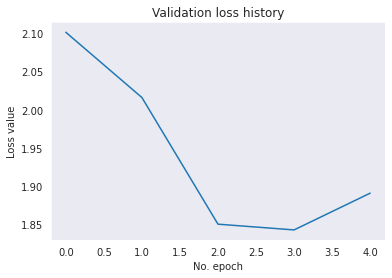

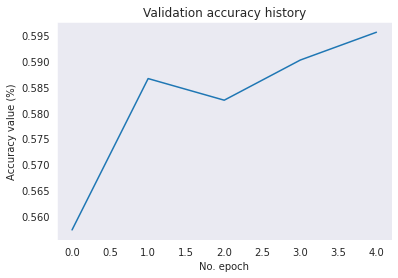

In [ ]:
# Visualize history
# Plot history: Validation loss
plt.plot(Model_history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(Model_history.history['val_acc'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

## Create and Compile a Simple LSTM Model with Word2Vec Embedding

In [ ]:
lstm_model = Sequential()
#Embedding layer
lstm_model.add(Embedding(vocab_size, embedding_size, weights=[embedding_matrix]))
lstm_model.add(LSTM(units=128))
lstm_model.add(Flatten())
lstm_model.add(Dropout(0.50))
lstm_model.add(Dense(50, activation='relu'))
lstm_model.add(Flatten())
lstm_model.add(Dropout(0.50))
lstm_model.add(Dense(50, activation='softmax'))
lstm_model.compile(optimizer=Adam(lr = 0.01), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         1070300   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                6450      
_________________________________________________________________
flatten_2 (Flatten)          (None, 50)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)               

In [ ]:
Batch_size = 100
Epochs = 5

Lstm_Model_history = lstm_model.fit(x_train, y_train, batch_size = Batch_size, validation_data = (x_val,y_val), epochs = Epochs)

Epoch 1/5
51/51 [==============================] - 20s 383ms/step - loss: 2.5320 - acc: 0.4904 - val_loss: 2.0484 - val_acc: 0.5568
Epoch 2/5
51/51 [==============================] - 19s 380ms/step - loss: 2.0429 - acc: 0.5353 - val_loss: 1.9691 - val_acc: 0.5657
Epoch 3/5
51/51 [==============================] - 19s 376ms/step - loss: 1.8444 - acc: 0.5542 - val_loss: 2.0100 - val_acc: 0.5591
Epoch 4/5
51/51 [==============================] - 19s 374ms/step - loss: 1.6946 - acc: 0.5673 - val_loss: 2.0423 - val_acc: 0.5633
Epoch 5/5
51/51 [==============================] - 19s 377ms/step - loss: 1.5786 - acc: 0.5803 - val_loss: 2.0721 - val_acc: 0.5251


In [ ]:
# Test the model after training
test_results = lstm_model.evaluate(x_test, y_test, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 2.1366703510284424 - Accuracy: 53.52449417114258%


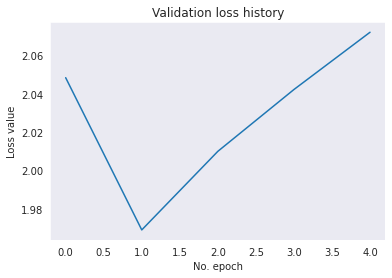

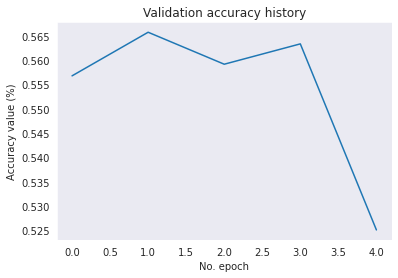

In [ ]:
# Visualize history
# Plot history: Validation loss
plt.plot(Lstm_Model_history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(Lstm_Model_history.history['val_acc'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [ ]:
y_pred = lstm_model.predict_classes(x_test)

In [ ]:
lstm_mat_test, lstm_report, LSTM_Accuracy_Score,LSTM_F1_Score = calculate_Accuracy_F1_Score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("confusion matrix = \n",lstm_mat_test)

confusion matrix = 
 [[669   0   0 ...   1   0   0]
 [  1   0   0 ...   3   0   0]
 [  1   0   5 ...   2   3   0]
 ...
 [  1   0   0 ...  88  42   0]
 [  1   0   0 ...   3  41   0]
 [  6   0   0 ...   1   0   0]]


In [ ]:
print(lstm_report)
print("Accuracy_Score: ", LSTM_Accuracy_Score)
print("F1 Score: ", LSTM_F1_Score)

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       758
           1       0.00      0.00      0.00         7
           2       0.83      0.22      0.34        23
           3       0.00      0.00      0.00         2
           4       0.14      0.48      0.22        50
           5       0.10      0.28      0.15        32
           6       0.00      0.00      0.00        22
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       1.00      0.10      0.18        20
          10       0.00      0.00      0.00        17
          11       0.00      0.00      0.00        33
          12       0.11      0.36      0.16        44
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         3
          17       0.87    

## Create and Compile a Simple LSTM Model with GLOVE Embedding

In [ ]:
lstm_model_glove = Sequential()
#Embedding layer
lstm_model_glove.add(Embedding(vocab_size, embedding_size, weights=[embedding_matrix_glove]))
lstm_model_glove.add(LSTM(units=128))
lstm_model_glove.add(Flatten())
lstm_model_glove.add(Dropout(0.50))
lstm_model_glove.add(Dense(50, activation='relu'))
lstm_model_glove.add(Flatten())
lstm_model_glove.add(Dropout(0.50))
lstm_model_glove.add(Dense(50, activation='softmax'))
lstm_model_glove.compile(optimizer=Adam(lr = 0.01), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
lstm_model_glove.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 100)         1070300   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               117248    
_________________________________________________________________
flatten_5 (Flatten)          (None, 128)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                6450      
_________________________________________________________________
flatten_6 (Flatten)          (None, 50)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)               

In [ ]:
Batch_size = 100
Epochs = 5

Lstm_glove_Model_history = lstm_model_glove.fit(x_train, y_train, batch_size = Batch_size, validation_data = (x_val,y_val), epochs = Epochs)

Epoch 1/5
51/51 [==============================] - 19s 378ms/step - loss: 2.5082 - acc: 0.4833 - val_loss: 2.0088 - val_acc: 0.5633
Epoch 2/5
51/51 [==============================] - 19s 381ms/step - loss: 2.0187 - acc: 0.5378 - val_loss: 1.8553 - val_acc: 0.5824
Epoch 3/5
51/51 [==============================] - 19s 379ms/step - loss: 1.7458 - acc: 0.5687 - val_loss: 1.8309 - val_acc: 0.5890
Epoch 4/5
51/51 [==============================] - 19s 379ms/step - loss: 1.5524 - acc: 0.5894 - val_loss: 1.8096 - val_acc: 0.5938
Epoch 5/5
51/51 [==============================] - 19s 379ms/step - loss: 1.3996 - acc: 0.6213 - val_loss: 1.9519 - val_acc: 0.5998


In [ ]:
# Test the model after training
test_results = lstm_model_glove.evaluate(x_test, y_test, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 2.0520665645599365 - Accuracy: 58.96057486534119%


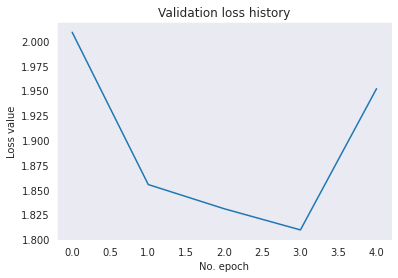

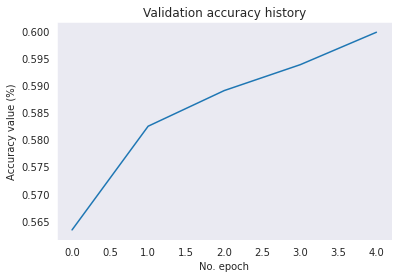

In [ ]:
# Visualize history
# Plot history: Validation loss
plt.plot(Lstm_glove_Model_history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(Lstm_glove_Model_history.history['val_acc'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

In [ ]:
y_pred = lstm_model_glove.predict_classes(x_test)

In [ ]:
lstm_glove_mat_test, lstm_glove_report, LSTM_Glove_Accuracy_Score,LSTM_Glove_F1_Score = calculate_Accuracy_F1_Score(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("confusion matrix = \n",lstm_glove_mat_test)

confusion matrix = 
 [[714   0   2 ...   0   0   0]
 [  3   0   0 ...   1   0   0]
 [  4   0   7 ...   1   3   0]
 ...
 [  3   0   1 ...  76  46   0]
 [  4   0   2 ...   0  41   0]
 [  9   0   2 ...   0   0   0]]


In [ ]:
print(lstm_glove_report)
print("Accuracy_Score: ", LSTM_Glove_Accuracy_Score)
print("F1 Score: ", LSTM_Glove_F1_Score)

              precision    recall  f1-score   support

           0       0.70      0.94      0.81       758
           1       0.00      0.00      0.00         7
           2       0.19      0.30      0.23        23
           3       0.00      0.00      0.00         2
           4       0.32      0.58      0.41        50
           5       0.16      0.44      0.23        32
           6       0.00      0.00      0.00        22
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        20
           9       0.93      0.70      0.80        20
          10       0.05      0.06      0.06        17
          11       0.10      0.06      0.08        33
          12       0.33      0.16      0.22        44
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         3
          17       0.83    

### Compare the Models

In [ ]:
Compare = [[LR_Accuracy_Score, LR_F1_Score],
           [LR_Grp_Accuracy_Score, LR_Grp_F1_Score],
           [SVC_Accuracy_Score, SVC_F1_Score],
           [SVC_Grped_Accuracy_Score, SVC_Grped_F1_Score],
           [DT_Accuracy_Score, DT_F1_Score],
           [DT_Grped_Accuracy_Score, DT_Grped_F1_Score],
           [RF_Accuracy_Score, RF_F1_Score],
           [RF_Grped_Accuracy_Score, RF_Grped_F1_Score],
           [ABC_Accuarcy_Score,ABC_F1_Score],
           [ABC_Grped_Accuarcy_Score, ABC_Grped_F1_Score],
           [Seq_NLP_Accuracy_Score,Seq_NLP_F1_Score],
           [LSTM_Accuracy_Score,LSTM_F1_Score],
           [LSTM_Glove_Accuracy_Score,LSTM_Glove_F1_Score]]

Compare_Models = pd.DataFrame(Compare, columns= ['Accuracy','F1 Score'], index=['LR Model','LR_Grped','SVC Model','SVC Grped','Decision Tree', 'Decision Tree Grped','Random Forest','Random Forest Grped','AdaBoost','AdaBoost Grped','Sequential NLP', 'LSTM with Word2Vec', 'LSTM with Glove'])
Compare_Models

,Accuracy,F1 Score
LR Model,0.641577,0.550900
LR_Grped,0.617682,0.526310
SVC Model,0.642772,0.553294
SVC Grped,0.621266,0.527660
Decision Tree,0.603943,0.590088
Decision Tree Grped,0.571685,0.553171
Random Forest,0.658901,0.587384
Random Forest Grped,0.635006,0.564301
AdaBoost,0.520311,0.387019
AdaBoost Grped,0.500597,0.369240


**Observations:**

1. LSTM with Glove is comparatively better than Word2Vec and Sequential NLP with respect to F1 score and also the best performance model in Deep learning model.



## **Future work to be done:**

1. Improving the existing models
2. Hyperparameters tuning
3. Bidirectional LSTM
4. Visual aids for Model Comparison